# Atividade 2 - Visão Computacional

O entregável de toda esta atividade vai ser um código-fonte em *Python*. 

Encorajamos vocês a fazerem vídeos demonstrando o resultado e a postar (pode ser privadamente) no YouTube

Você pode entregar enviando o código para o Github e postando o vídeo *ou* mostrando ao vivo aos professores

**Não programe no Jupyter** - use um programa Python



Obs.: [Instale o GIT-FLS](../guides/git_lfs.md) para poder baixar este repositório.



Você deve ter uma folha com o padrão anexo. 
*Dica:* Se não tiver, é possível fazer também com um tablet ou *smartphone*
 
<img src="folha_atividade.png" width=300>

## Importando Bibliotecas:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
print("OpenCV version: " + cv2.__version__)

OpenCV version: 4.1.1


## Parte 1 - Calibração:

Ouça a explicação do professor sobre o modelo de câmera *pinhole*  e desenhe a medida $f$ que separa o plano focal da pupila da câmera

Detalhe como calculou $f$

## Parte 2 - Análise de *Frames*:

Modifique um dos exemplos `draw_circles_video.py` ou `videoplay.py` para passar a ler dados da webcam e identificar o círculo magenta e o círculo ciano, usando o `inRange`

## Parte 3

Assumindo que a folha se mantém sempre paralela ao plano de imagem da câmera, imprima a distância entre a folha e sua câmera

## Parte 4

Trace uma linha entre os centros do círculo magenta e do círculo ciano.

Imprima na tela o ângulo entre esta linha e a horizontal

## Parte 5

Baseado nos círculos encontrados pela transformada de Hough, desenhe um círculo sobre o círculo ciano e outro sobre o círculo magenta.

Dica: Use a função `cv2.circle` e veja o exemplo [draw_circles_video.py](draw_circles_video.py).

**Desafio bônus**: ser capaz de eliminar circulos espúrios (aqueles que não são os da folha)

## Parte 6

Usando um detector de features `BRISK`, identifique o escrito *Insper* na folha. Veja os exemplos [no notebook](BRISK%20Features.ipynb) e em [em código](features.py) .

## Test Area

In [2]:
bgr_frame = cv2.imread("single_frame.jpg")
rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
hsv_frame = cv2.cvtColor(rgb_frame, cv2.COLOR_RGB2HSV)
hsv_frame.shape

(480, 640, 3)

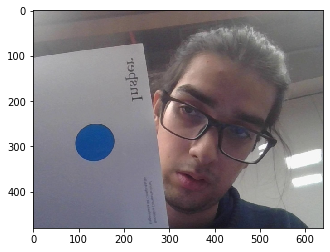

In [4]:
plt.imshow(rgb_frame)

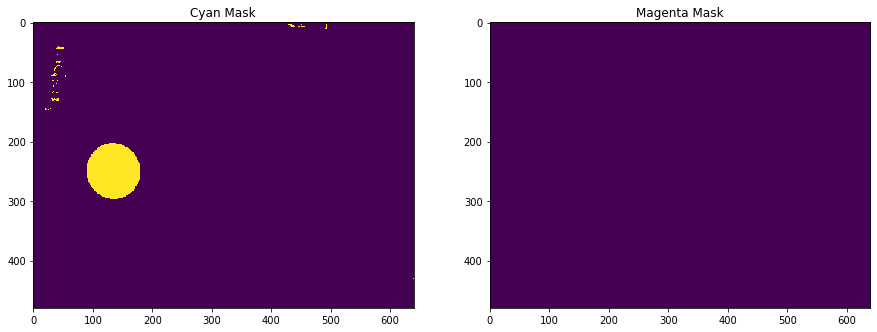

In [23]:
# Cyan's Hue value of HSV color space:
cyan_hue = 180
# Magenta's Hue value of HSV color space:
magenta_hue = 330

# Converting 
cyan_high = (cyan_hue/2 + 40, 255, 255)
cyan_low = (cyan_hue/2 - 40, 50, 50)

magenta_high = (magenta_hue/2 + 40, 255, 255)
magenta_low = (magenta_hue - 40, 50, 50)

# Creating masks for each one of the target colors:
cyan_mask = cv2.inRange(hsv_frame, cyan_low, cyan_high)
magenta_mask = cv2.inRange(hsv_frame, magenta_low, magenta_high)

# Exibiting resulting masks:

plt.figure(figsize=(15,7))

plt.subplot(121)
plt.imshow(cyan_mask)
plt.title("Cyan Mask")

plt.subplot(122)
plt.imshow(magenta_mask)
plt.title("Magenta Mask")

plt.show()

In [21]:
from heapq import nlargest

valid_circles = [[439.0, 315.0, 36.2], [175.0, 275.0, 36.8],
                 [439.0, 317.0, 37.0], [173.0, 277.0, 36.8],
                 [173.0, 283.0, 37.2], [423.0, 337.0, 37.0],
                 [159.0, 309.0, 38.0], [149.0, 313.0, 38.6],
                 [413.0, 331.0, 37.0], [141.0, 309.0, 38.0],
                 [413.0, 327.0, 36.4], [145.0, 305.0, 38.0],
                 [413.0, 329.0, 37.0], [153.0, 303.0, 38.0],
                 [153.0, 309.0, 36.4], [149.0, 313.0, 37.0],
                 [409.0, 345.0, 38.0], [145.0, 309.0, 37.2],
                 [407.0, 343.0, 37.8], [141.0, 303.0, 38.2],
                 [143.0, 295.0, 38.6], [415.0, 331.0, 37.6],
                 [143.0, 293.0, 39.8], [419.0, 327.0, 36.8],
                 [419.0, 331.0, 37.2], [145.0, 297.0, 39.2],
                 [143.0, 299.0, 40.0], [421.0, 333.0, 37.4],
                 [425.0, 331.0, 38.4], [145.0, 297.0, 41.0],
                 [427.0, 327.0, 38.2], [143.0, 293.0, 41.0],
                 [429.0, 321.0, 39.4], [141.0, 283.0, 42.6],
                 [435.0, 317.0, 39.8], [139.0, 283.0, 41.6],
                 [143.0, 283.0, 42.6], [439.0, 317.0, 40.4],
                 [443.0, 321.0, 41.0], [143.0, 283.0, 41.0],
                 [147.0, 283.0, 43.2], [443.0, 319.0, 39.8],
                 [149.0, 281.0, 43.0], [449.0, 315.0, 42.2],
                 [147.0, 279.0, 44.2], [449.0, 315.0, 42.0],
                 [453.0, 313.0, 41.8], [149.0, 273.0, 44.6],
                 [455.0, 313.0, 42.6], [149.0, 277.0, 44.8],
                 [457.0, 311.0, 42.2], [149.0, 275.0, 44.8],
                 [457.0, 309.0, 42.4], [149.0, 275.0, 45.4],
                 [147.0, 271.0, 45.6], [457.0, 303.0, 40.0],
                 [147.0, 267.0, 44.6], [459.0, 305.0, 44.4],
                 [145.0, 267.0, 45.2], [463.0, 301.0, 44.6],
                 [145.0, 265.0, 46.2], [469.0, 303.0, 46.2],
                 [143.0, 265.0, 46.8], [469.0, 303.0, 44.8],
                 [143.0, 265.0, 46.2], [469.0, 301.0, 44.0],
                 [141.0, 261.0, 46.8], [469.0, 299.0, 44.2],
                 [469.0, 295.0, 45.0], [139.0, 261.0, 48.2],
                 [471.0, 293.0, 44.4], [141.0, 255.0, 47.0],
                 [139.0, 253.0, 47.6], [475.0, 293.0, 44.6],
                 [477.0, 289.0, 45.8], [141.0, 253.0, 48.2],
                 [141.0, 251.0, 47.8], [477.0, 291.0, 47.2],
                 [483.0, 287.0, 46.8], [141.0, 247.0, 49.4],
                 [141.0, 249.0, 49.2], [485.0, 287.0, 47.4],
                 [489.0, 287.0, 47.6], [139.0, 249.0, 48.8],
                 [491.0, 285.0, 47.2], [143.0, 247.0, 48.4],
                 [493.0, 285.0, 47.8], [141.0, 249.0, 51.6],
                 [497.0, 285.0, 49.2], [145.0, 245.0, 48.6]]


largest_cicles = nlargest(2, valid_circles, key=lambda x:x[2])
print(largest_cicles)


aba = [['magenta', [457.0, 277.0, 32.6]],
       ['cyan', [221.0, 239.0, 34.0]]]

name = aba[0][0]
x_pos = aba[0][1][0]
y_pos = aba[0][1][1]
radius = aba[0][1][2]

for circle in aba:
    print('color:', circle[0], ' X-pos:', circle[1][0], ' Y-pos:', circle[1][1], ' radius:', circle[1][2])

[[141.0, 249.0, 51.6], [141.0, 247.0, 49.4]]
color: magenta  X-pos: 457.0  Y-pos: 277.0  radius: 32.6
color: cyan  X-pos: 221.0  Y-pos: 239.0  radius: 34.0
